##  Player Analysis

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [140]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

In [141]:
df1.rename(columns={"id" : 'match_id'}, inplace=True)

In [142]:
overall= pd.merge(df1, df2, on='match_id', how='outer')

In [143]:
overall

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [144]:
overall.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [146]:
overall = overall[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

In [147]:
overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,1,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,2,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,3,DA Warner,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,4,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,5,DA Warner,TS Mills,2,0,0,2,2,NaN,NaN


### Considering only KKR VS RCB Matches

In [148]:
DM=overall[np.logical_or(np.logical_and(overall['team1']=='Kolkata Knight Riders',overall['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(overall['team2']=='Kolkata Knight Riders',overall['team1']=='Royal Challengers Bangalore'))]

In [149]:
DM.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
6254,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,1,SP Narine,S Badree,0,0,0,0,0,NaN,NaN
6255,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,2,SP Narine,S Badree,0,0,4,0,4,NaN,NaN
6256,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,3,SP Narine,S Badree,0,0,4,0,4,NaN,NaN
6257,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,4,SP Narine,S Badree,0,0,4,0,4,NaN,NaN
6258,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,5,SP Narine,S Badree,0,0,6,0,6,NaN,NaN


## Dinesh Kartik Analysis

In [150]:
cond1 = DM["season"] == 2018
cond2 = DM["season"] == 2019
final = DM[cond1 | cond2]
final

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
150944,7896,2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,BB McCullum,R Vinay Kumar,0,0,4,0,4,NaN,NaN
150945,7896,2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,2,BB McCullum,R Vinay Kumar,0,0,0,0,0,NaN,NaN
150946,7896,2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,3,BB McCullum,R Vinay Kumar,0,0,0,0,0,NaN,NaN
150947,7896,2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,4,BB McCullum,R Vinay Kumar,0,0,6,0,6,NaN,NaN
150948,7896,2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,5,BB McCullum,R Vinay Kumar,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173253,11326,2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Royal Challengers Bangalore,2,Kolkata Knight Riders,Royal Challengers Bangalore,...,2,N Rana,M Ali,0,0,1,0,1,NaN,NaN
173254,11326,2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Royal Challengers Bangalore,2,Kolkata Knight Riders,Royal Challengers Bangalore,...,3,AD Russell,M Ali,0,0,6,0,6,NaN,NaN
173255,11326,2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Royal Challengers Bangalore,2,Kolkata Knight Riders,Royal Challengers Bangalore,...,4,AD Russell,M Ali,0,0,0,0,0,NaN,NaN
173256,11326,2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Royal Challengers Bangalore,2,Kolkata Knight Riders,Royal Challengers Bangalore,...,5,AD Russell,M Ali,0,0,0,0,0,AD Russell,run out


In [196]:
batsman_name = final["batsman"]=='KD Karthik'
batsmen_score_20 = pd.DataFrame(final.groupby(['season',"match_id",batsman_name]).agg({'batsman_runs' : 'sum', 'ball' :'count'}))
batsmen_score_20

batsman_runs  ball
season match_id batsman                    
2018   7896     False             314   212
                True               39    32
       7922     False             328   236
                True               23    10
2019   11153    False             391   231
                True               20    15
       11326    False             416   253

Here True value indicates Dinesh Karthik 's performance in each match he played against RCB

In [152]:
for value in final.groupby("batsman"):
    if value[0] == "KD Karthik":
        print("Total Runs scored by Dinesh Karthik against RCB in last 2 years:",value[1]['batsman_runs'].sum())

Total Runs scored by Dinesh Karthik against RCB in last 2 years: 82


In [324]:
batsman_name = 'KD Karthik'

def batsmen_out_type(batsman_name):
    for value in final.groupby(['player_dismissed']):
        if value[0] == batsman_name :
            return value[1]['dismissal_kind'].value_counts()

stats = batsmen_out_type(batsman_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Kind' , 'dismissal_kind' : 'Count'})
print("Dismissal Type of Dinesh Karthik :")
stats

Dismissal Type of Dinesh Karthik :


,Dismissal Kind,Count
0,caught,2


In [323]:
batsmen_average = pd.DataFrame(final.groupby(['batsman']).agg({'batsman_runs' : 'sum','player_dismissed' : 'count'}))
batsmen_average['Average'] = batsmen_average['batsman_runs']/batsmen_average['player_dismissed']
batsmen_average.loc[["KD Karthik","V Kohli"],:]

,batsman_runs,player_dismissed,Average
batsman,,,
KD Karthik,82,2,41.000000
V Kohli,284,3,94.666667


## Virat Kohli Analysis

In [306]:
virat = final[final["batsman"]=="V Kohli"]
virat = virat[virat["batsman_runs"]==4]
virat= virat.groupby("match_id")["batsman_runs"].size()
match_wise_fours = pd.DataFrame(virat)

In [313]:
match_wise_fours.columns=["Fours"]; match_wise_fours.index = [1,2,3,4]

In [315]:
print("No.of fours scored by Virat in last 2 years against KKR :")
match_wise_fours

No.of fours scored by Virat in last 2 years against KKR :


,Fours
1,1
2,5
3,9
4,9


In [333]:

print("Average no of fours scored by Virat against KKR :",match_wise_fours.mean()[0])

Average no of fours scored by Virat against KKR : 6.0


### No Ball Runs

In [241]:
filled= final.where(final["noball_runs"] >0)

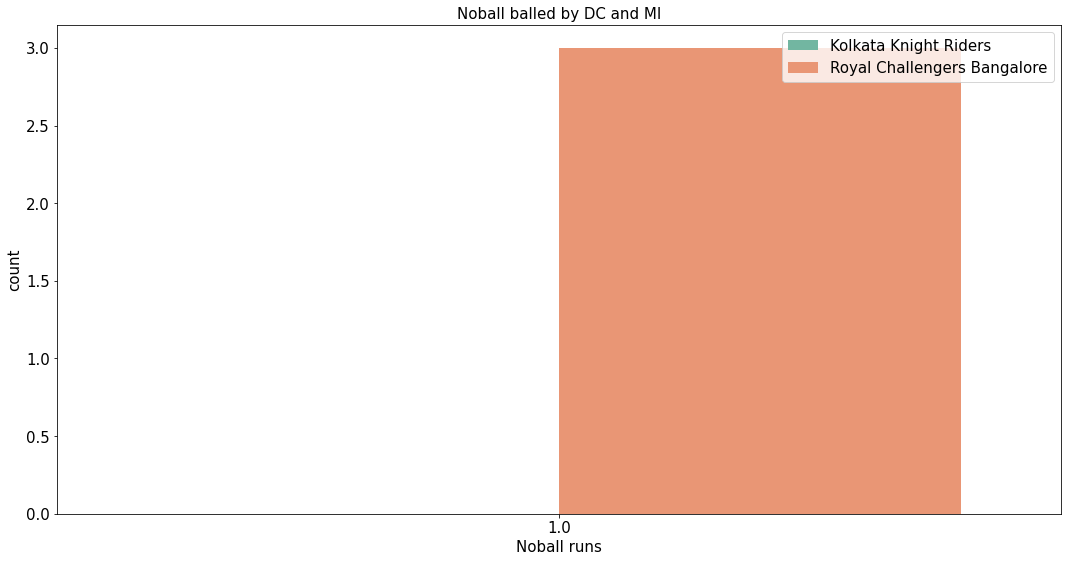

In [242]:
plt.figure(figsize = (18,9))
sns.countplot(filled['noball_runs'],palette='Set2',hue=final['bowling_team'])
plt.title('Noball balled by DC and MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Noball runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

From the above analysis we can predict that DK has not performed quite well against RCB , so chances of his scoring 30+ today are quite less.

We can also predict from our analysis and Virat's recent form that Virat can score around 4 fours in todays match.

Also , from seeing the no ball trend we can see that there are chances of 0 no balls or atmost 1 no ball in today's match.

